## Importing Libraries

In [1]:
import pandas as pd
import requests as req
from bs4 import BeautifulSoup 
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Extracting zipcodes of Neighborhoods

In [2]:
import requests 
from bs4 import BeautifulSoup 

url = 'https://geographic.org/streetview/india/maharashtra/konkan/mumbai.html'
results = requests.get(url).text
#print(results.text)
soup = BeautifulSoup(results, 'lxml')
li = []
for i in soup.select('li'):
    li.append(i.text.split())

In [3]:
area_name = []
pincodes = []
lat = []
lng = []
for i in range(len(li)):
    
    area_name.append(li[i][0:2])
    lat.append(li[i][-2])
    lng.append(li[i][-1])
    pincodes.append(li[i][-3])

for i in range(len(lat)):
    lat[i] = float(lat[i].replace(',',''))  

for i in range(len(lng)):
    lng[i] = float(lng[i].replace(',',''))

In [4]:
data = pd.DataFrame({'Pincode':pincodes,'Latitude':lat,'Longitude':lng})
data = data[data['Latitude']<20]
data = data[data['Longitude']<73]

In [5]:
data.drop_duplicates(inplace=True)
data = data.sort_values(by='Pincode')
data

,Pincode,Latitude,Longitude
145,400001,18.935293,72.835751
140,400001,18.935337,72.839770
204,400001,18.929967,72.833819
18,400001,18.934609,72.834776
208,400001,18.920387,72.831437
...,...,...,...
126,400103,19.246141,72.848594
71,400104,19.160914,72.846979
73,400104,19.166458,72.848810
15,400104,19.167072,72.833529


In [6]:
new_data = pd.read_html("https://www.mapsofindia.com/pincode/india/maharashtra/mumbai/")
area_name = pd.DataFrame(new_data[0])
area_name.drop(['Pincode Details.2','Pincode Details.3'],axis=1,inplace=True)
area_name.rename(columns={'Pincode Details': "Location", "Pincode Details.1": "Pincode"},inplace=True)
area_name.drop_duplicates(inplace=True)
area_name = area_name.sort_values(by='Pincode')
area_name

,Location,Pincode
18,Bazargate,400001
160,Tajmahal,400001
164,Town Hall,400001
159,Stock Exchange,400001
93,M.P.t.,400001
...,...,...
130,Oshiwara,400102
75,Jogeshwari West,400102
104,Mandapeshwar,400103
116,Motilal Nagar,400104


In [7]:
merged_data = area_name.merge(how='inner',right=data)
merged_data.reset_index(inplace = True)
merged_data

,index,Location,Pincode,Latitude,Longitude
0,0,Bazargate,400001,18.935293,72.835751
1,1,Bazargate,400001,18.935337,72.839770
2,2,Bazargate,400001,18.929967,72.833819
3,3,Bazargate,400001,18.934609,72.834776
4,4,Bazargate,400001,18.920387,72.831437
...,...,...,...,...,...
631,631,Mandapeshwar,400103,19.246141,72.848594
632,632,Motilal Nagar,400104,19.160914,72.846979
633,633,Motilal Nagar,400104,19.166458,72.848810
634,634,Motilal Nagar,400104,19.167072,72.833529


## Exploring Neighborhoods using Foursquare API

In [8]:
CLIENT_ID = 'KVTKFYOELKQETOBFOSNGULRYBX4JBSSZM4BIIMG2P322KGCS' # your Foursquare ID
CLIENT_SECRET = 'JXLUO51FNV144C51X3T32I0S3PLNUUDEOFI5G5KVTO3RRBUU' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: KVTKFYOELKQETOBFOSNGULRYBX4JBSSZM4BIIMG2P322KGCS
CLIENT_SECRET:JXLUO51FNV144C51X3T32I0S3PLNUUDEOFI5G5KVTO3RRBUU


In [9]:
url = 'https://api.foursquare.com/v2/venues/search?q=mcdonalds&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            500, 
            50)

In [10]:
def getNearbyVenues(latitudes, longitudes, radius=500):
    #count = 0
    venues_list=[]
    for  lat, lng in zip(latitudes, longitudes):
        
        #print(count)
        #count = count + 1
    
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            60)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
       
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [ ]:
nearby_venues = getNearbyVenues(data['Latitude'], data['Longitude'], radius=500)

## Exporting data to csv for further use

In [ ]:
nearby_venues.to_csv("Nearby_Mumbai_Venues.csv")

In [11]:
nearby_venues = pd.read_csv("Nearby_Mumbai_Venues.csv")

In [166]:
! pip install dataframe_image

     |████████████████████████████████| 1.2 MB 5.9 MB/s eta 0:00:01
     |████████████████████████████████| 258 kB 2.3 MB/s eta 0:00:01
     |████████████████████████████████| 149 kB 3.9 MB/s eta 0:00:01


In [12]:
nearby_venues

,Index,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,0,400001,18.935293,72.835751,Starbucks,18.932190,72.833959,Coffee Shop
1,1,400001,18.935293,72.835751,Taste of Kerala,18.934205,72.833215,Indian Restaurant
2,2,400001,18.935293,72.835751,Mahesh Lunch Home,18.934121,72.833821,Indian Restaurant
3,3,400001,18.935293,72.835751,Yazdani Bakery,18.933191,72.833591,Bakery
4,4,400001,18.935293,72.835751,Café Universal,18.936021,72.837453,Irani Cafe
...,...,...,...,...,...,...,...,...
3042,3042,400104,19.160914,72.846979,Raga Bar,19.163421,72.843139,Indian Restaurant
3043,3043,400104,19.167072,72.833529,Katta aka Narayan,19.163502,72.831590,Smoke Shop
3044,3044,400104,19.167072,72.833529,Konkan Swad,19.163463,72.834995,Seafood Restaurant
3045,3045,400104,19.167072,72.833529,Ideal Furnishings,19.165810,72.835015,Furniture / Home Store


In [169]:
import dataframe_image as dfi
nearby_venues.head(10).dfi.export('df.png')

In [13]:
nearby_venues.rename(columns={'Neighborhood':'Pincode'},inplace=True)

In [14]:
venues_data = nearby_venues

In [15]:
merged_data['Pincode']= merged_data['Pincode'].astype('int')

In [16]:
nearby_venues

,Index,Pincode,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,0,400001,18.935293,72.835751,Starbucks,18.932190,72.833959,Coffee Shop
1,1,400001,18.935293,72.835751,Taste of Kerala,18.934205,72.833215,Indian Restaurant
2,2,400001,18.935293,72.835751,Mahesh Lunch Home,18.934121,72.833821,Indian Restaurant
3,3,400001,18.935293,72.835751,Yazdani Bakery,18.933191,72.833591,Bakery
4,4,400001,18.935293,72.835751,Café Universal,18.936021,72.837453,Irani Cafe
...,...,...,...,...,...,...,...,...
3042,3042,400104,19.160914,72.846979,Raga Bar,19.163421,72.843139,Indian Restaurant
3043,3043,400104,19.167072,72.833529,Katta aka Narayan,19.163502,72.831590,Smoke Shop
3044,3044,400104,19.167072,72.833529,Konkan Swad,19.163463,72.834995,Seafood Restaurant
3045,3045,400104,19.167072,72.833529,Ideal Furnishings,19.165810,72.835015,Furniture / Home Store


## Plotting Data

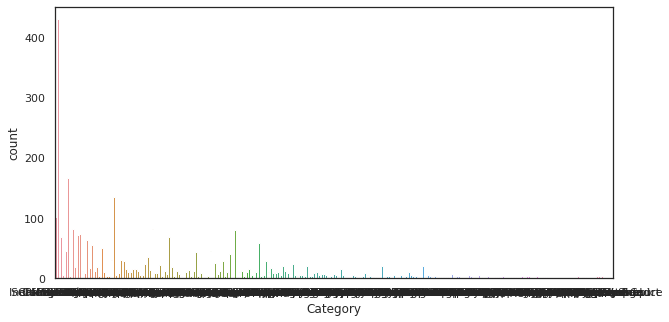

In [165]:
plt.figure(figsize=(10,5))
sns.countplot(x=nearby_venues['Category'])

plt.savefig('AllCategories.png')

In [17]:
nearby_venues.rename(columns={'Venue Category':'Category'},inplace=True)

In [18]:
categories_count  =pd.DataFrame()
categories_count['Count'] = nearby_venues.Category.value_counts()

In [19]:
categories_count['Category']=categories_count.index
categories_count.reset_index(drop=True,inplace=True)
categories_count.head()

,Count,Category
0,429,Indian Restaurant
1,166,Café
2,135,Fast Food Restaurant
3,101,Coffee Shop
4,82,Restaurant


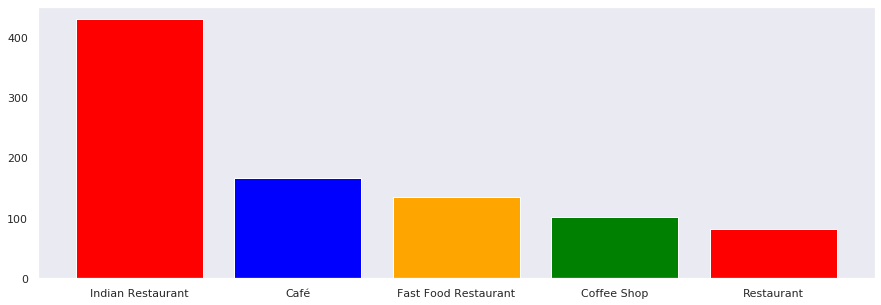

In [88]:
plt.figure(figsize=(15,5))
plt.bar(x=categories_count['Category'].head(),height=categories_count['Count'].head()
        ,color=['Red','Blue','Orange','Green'])
sns.set_style("white")
plt.savefig('Countplot.png')

In [20]:
venues = merged_data.iloc[:,0:3].merge(how='inner',right=nearby_venues)
venues.drop_duplicates(inplace=True)
venues

,index,Location,Pincode,Index,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Category
0,0,Bazargate,400001,0,18.935293,72.835751,Starbucks,18.932190,72.833959,Coffee Shop
1,0,Bazargate,400001,1,18.935293,72.835751,Taste of Kerala,18.934205,72.833215,Indian Restaurant
2,0,Bazargate,400001,2,18.935293,72.835751,Mahesh Lunch Home,18.934121,72.833821,Indian Restaurant
3,0,Bazargate,400001,3,18.935293,72.835751,Yazdani Bakery,18.933191,72.833591,Bakery
4,0,Bazargate,400001,4,18.935293,72.835751,Café Universal,18.936021,72.837453,Irani Cafe
...,...,...,...,...,...,...,...,...,...,...
43335,635,Motilal Nagar,400104,3042,19.160914,72.846979,Raga Bar,19.163421,72.843139,Indian Restaurant
43336,635,Motilal Nagar,400104,3043,19.167072,72.833529,Katta aka Narayan,19.163502,72.831590,Smoke Shop
43337,635,Motilal Nagar,400104,3044,19.167072,72.833529,Konkan Swad,19.163463,72.834995,Seafood Restaurant
43338,635,Motilal Nagar,400104,3045,19.167072,72.833529,Ideal Furnishings,19.165810,72.835015,Furniture / Home Store


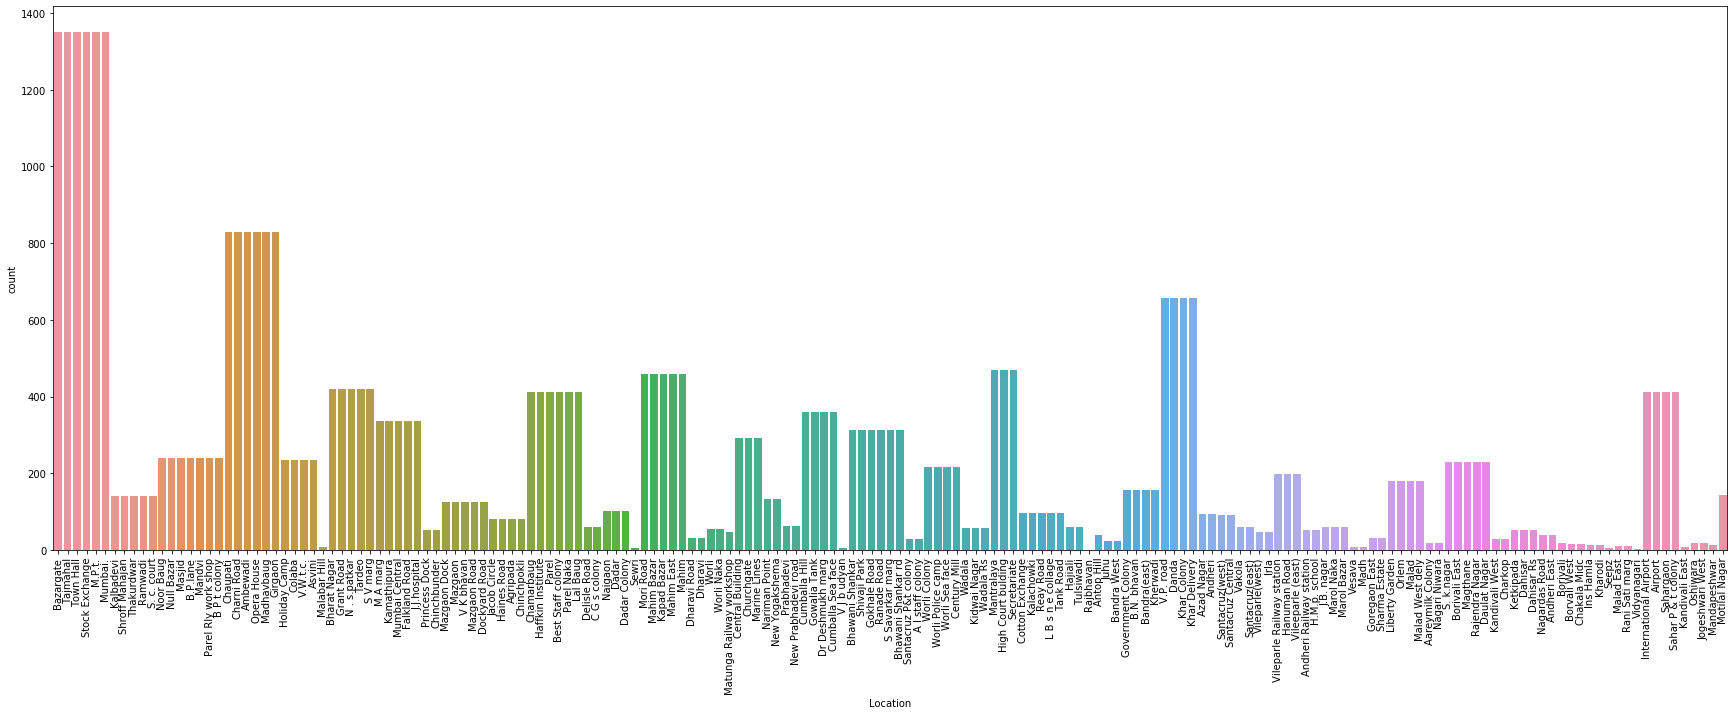

In [21]:
plt.figure(figsize=(30,10))
sns.countplot(x=venues['Location'])
plt.xticks(rotation=90)
plt.savefig('location_Countplot.png')

## Grouping Data by Location

In [20]:
merged_data[merged_data['Location']=='Worli']

,index,Location,Pincode,Latitude,Longitude
316,316,Worli,400018,18.984683,72.819052
317,317,Worli,400018,19.000633,72.816812


In [22]:
venues.groupby('Location').count()

,index,Pincode,Index,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Category
Location,,,,,,,,,
A I staff colony,28,28,28,28,28,28,28,28,28
Aareymilk Colony,18,18,18,18,18,18,18,18,18
Agripada,80,80,80,80,80,80,80,80,80
Airport,412,412,412,412,412,412,412,412,412
Ambewadi,828,828,828,828,828,828,828,828,828
...,...,...,...,...,...,...,...,...,...
Worli,54,54,54,54,54,54,54,54,54
Worli Colony,216,216,216,216,216,216,216,216,216
Worli Naka,54,54,54,54,54,54,54,54,54


## Perfoming One hot encoding

In [23]:
onehot_venues = pd.get_dummies(venues[['Category']], prefix="", prefix_sep="")
onehot_venues['Location'] = venues['Location']
onehot_venues['Pincode'] = venues['Pincode']

In [24]:
fixed_columns = [onehot_venues.columns[-1]] + list(onehot_venues.columns[:-1])
onehot_venues = onehot_venues[fixed_columns]
new_data = onehot_venues

In [25]:
onehot_venues = onehot_venues.groupby('Location').mean().reset_index()

In [26]:
onehot_venues.sort_values(by='Pincode',inplace=True)

In [27]:
onehot_venues

,Location,Pincode,ATM,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Train Station,Travel & Transport,Tunnel,Vegetarian / Vegan Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo
88,M.P.t.,400001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.004444,0.0,0.0,0.0,0.0,0.0,0.0
16,Bazargate,400001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.004444,0.0,0.0,0.0,0.0,0.0,0.0
153,Stock Exchange,400001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.004444,0.0,0.0,0.0,0.0,0.0,0.0
113,Mumbai.,400001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.004444,0.0,0.0,0.0,0.0,0.0,0.0
154,Tajmahal,400001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.004444,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Kandivali East,400101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
125,Oshiwara,400102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
70,Jogeshwari West,400102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
99,Mandapeshwar,400103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


## Preprocessing Data

In [28]:
venues[venues['Category']=='Café']

,index,Location,Pincode,Index,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Category
8,0,Bazargate,400001,8,18.935293,72.835751,Cafe Excelsior,18.937701,72.833566,Café
28,0,Bazargate,400001,28,18.935293,72.835751,Mocambo Café,18.934267,72.833698,Café
37,0,Bazargate,400001,37,18.935293,72.835751,Plenty,18.931234,72.834076,Café
38,0,Bazargate,400001,38,18.935293,72.835751,Model Cafe,18.936027,72.840418,Café
53,0,Bazargate,400001,53,18.935337,72.839770,Model Cafe,18.936027,72.840418,Café
...,...,...,...,...,...,...,...,...,...,...
43261,633,Motilal Nagar,400104,3040,19.160914,72.846979,Zing Cafe,19.159772,72.842926,Café
43287,634,Motilal Nagar,400104,3030,19.156206,72.840314,Zing Cafe,19.159772,72.842926,Café
43297,634,Motilal Nagar,400104,3040,19.160914,72.846979,Zing Cafe,19.159772,72.842926,Café
43323,635,Motilal Nagar,400104,3030,19.156206,72.840314,Zing Cafe,19.159772,72.842926,Café


In [29]:
onehot_venues.columns.get_loc("Café")

41

In [30]:
venue_name = venues[venues['Category']=='Café'].iloc[:,2:9]

In [31]:
venue_name.drop(['Index','Neighborhood Latitude','Neighborhood Longitude'],axis=1,inplace=True)

In [32]:
venue_name.drop_duplicates(inplace=True)

In [33]:
venues

,index,Location,Pincode,Index,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Category
0,0,Bazargate,400001,0,18.935293,72.835751,Starbucks,18.932190,72.833959,Coffee Shop
1,0,Bazargate,400001,1,18.935293,72.835751,Taste of Kerala,18.934205,72.833215,Indian Restaurant
2,0,Bazargate,400001,2,18.935293,72.835751,Mahesh Lunch Home,18.934121,72.833821,Indian Restaurant
3,0,Bazargate,400001,3,18.935293,72.835751,Yazdani Bakery,18.933191,72.833591,Bakery
4,0,Bazargate,400001,4,18.935293,72.835751,Café Universal,18.936021,72.837453,Irani Cafe
...,...,...,...,...,...,...,...,...,...,...
43335,635,Motilal Nagar,400104,3042,19.160914,72.846979,Raga Bar,19.163421,72.843139,Indian Restaurant
43336,635,Motilal Nagar,400104,3043,19.167072,72.833529,Katta aka Narayan,19.163502,72.831590,Smoke Shop
43337,635,Motilal Nagar,400104,3044,19.167072,72.833529,Konkan Swad,19.163463,72.834995,Seafood Restaurant
43338,635,Motilal Nagar,400104,3045,19.167072,72.833529,Ideal Furnishings,19.165810,72.835015,Furniture / Home Store


In [36]:
cafe_data = pd.DataFrame()
cafe_data = onehot_venues.iloc[:,0:2] 

In [37]:
cafe_data = cafe_data.merge(how='inner',right=onehot_venues.iloc[:,1:42:40])
cafe_data.drop_duplicates(inplace=True)
cafe_data

,Location,Pincode,Café
0,M.P.t.,400001,0.088889
6,Bazargate,400001,0.088889
12,Stock Exchange,400001,0.088889
18,Mumbai.,400001,0.088889
24,Tajmahal,400001,0.088889
...,...,...,...
652,Kandivali East,400101,0.000000
653,Oshiwara,400102,0.000000
655,Jogeshwari West,400102,0.000000
657,Mandapeshwar,400103,0.000000


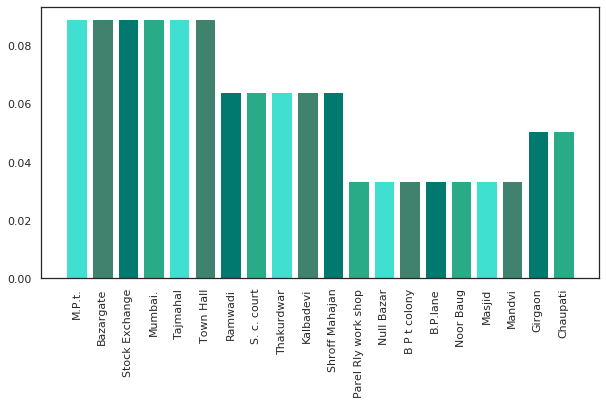

In [160]:
plt.figure(figsize=(10,5))
plt.bar(x=cafe_data['Location'].head(20),
        height=cafe_data['Café'].head(20)
       ,color=['#40e0d0','#40826d','#01796f','#29ab87'])
plt.xticks(rotation=90)
plt.savefig('CafeFrequencyPlot.png')

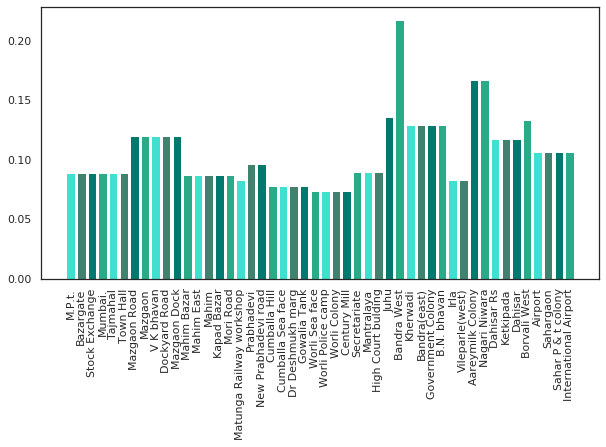

In [161]:
plt.figure(figsize=(10,5))
plt.bar(x=cafe_data[cafe_data['Café']>=0.07]['Location'],
        height=cafe_data[cafe_data['Café']>=0.07]['Café']
       ,color=['#40e0d0','#40826d','#01796f','#29ab87'])
plt.xticks(rotation=90)
plt.savefig('CafeFrequencyHighest.png')

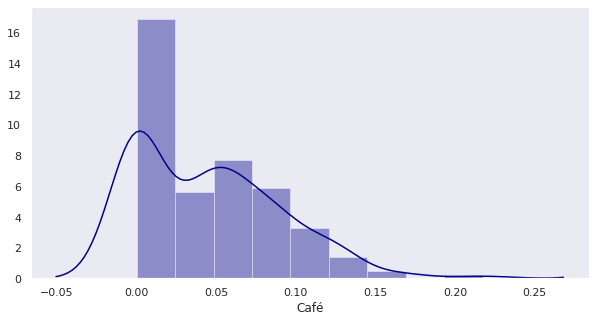

In [184]:
plt.figure(figsize=(10,5))
sns.distplot(cafe_data['Café'],color='darkblue')
plt.savefig('FeqDist.png')

## Final Dataset

In [43]:
cafe_data_merged=cafe_data.merge(how='inner',right=venue_name)
cafe_data_merged.drop_duplicates(inplace=True)
cafe_data_merged.rename(columns={'Location':'Neighborhood'},inplace=True)
cafe_data_merged.sort_values(by='Café',ascending=False,inplace=True)
cafe_data_merged

,Neighborhood,Pincode,Café,Venue,Venue Latitude,Venue Longitude
281,Bandra West,400050,0.217391,Café Coffee Day - The Lounge,19.095412,72.852895
284,Bandra West,400050,0.217391,Cafe Coffee Day,19.092273,72.853185
280,Bandra West,400050,0.217391,Café Coffee Day,19.097799,72.848983
282,Bandra West,400050,0.217391,The hub,19.096669,72.853362
283,Bandra West,400050,0.217391,Mars Lounge - Sahara Star,19.094941,72.854182
...,...,...,...,...,...,...
91,B.P.lane,400003,0.033333,Noorani Milk Centre,18.954749,72.833382
119,Asvini,400005,0.021277,Grub Shup,19.040679,72.846168
121,Holiday Camp,400005,0.021277,Grub Shup,19.040679,72.846168
122,Colaba,400005,0.021277,Grub Shup,19.040679,72.846168


In [44]:
cafe_data_merged = cafe_data_merged[cafe_data_merged['Neighborhood']!='Bandra West']
cafe_data_merged

,Neighborhood,Pincode,Café,Venue,Venue Latitude,Venue Longitude
335,Aareymilk Colony,400065,0.166667,Cafe Mosaque,19.162695,72.887740
336,Nagari Niwara,400065,0.166667,Cafe Mosaque,19.162695,72.887740
278,Juhu,400049,0.136364,The hub,19.096669,72.853362
279,Juhu,400049,0.136364,Café Coffee Day - The Lounge,19.095412,72.852895
277,Juhu,400049,0.136364,Café Coffee Day,19.097799,72.848983
...,...,...,...,...,...,...
91,B.P.lane,400003,0.033333,Noorani Milk Centre,18.954749,72.833382
119,Asvini,400005,0.021277,Grub Shup,19.040679,72.846168
121,Holiday Camp,400005,0.021277,Grub Shup,19.040679,72.846168
122,Colaba,400005,0.021277,Grub Shup,19.040679,72.846168


## Applying Kmeans

In [45]:
from sklearn.cluster import KMeans
kmeans_data = cafe_data_merged.drop(['Neighborhood','Venue Latitude','Venue Longitude','Pincode','Venue'],axis=1)
kmeans = KMeans(n_clusters=5, random_state=0).fit(kmeans_data)
kmeans.labels_

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

## Adding Cluster labels

In [46]:
cafe_data_merged.insert(0, 'Cluster Labels', kmeans.labels_)

In [55]:
cafe_data_merged = cafe_data_merged.drop_duplicates()
cafe_data_merged.sort_values(by='Café',ascending=False)

,Cluster Labels,Neighborhood,Pincode,Café,Venue,Venue Latitude,Venue Longitude
335,4,Aareymilk Colony,400065,0.166667,Cafe Mosaque,19.162695,72.887740
336,4,Nagari Niwara,400065,0.166667,Cafe Mosaque,19.162695,72.887740
278,4,Juhu,400049,0.136364,The hub,19.096669,72.853362
279,4,Juhu,400049,0.136364,Café Coffee Day - The Lounge,19.095412,72.852895
277,4,Juhu,400049,0.136364,Café Coffee Day,19.097799,72.848983
...,...,...,...,...,...,...,...
90,2,B P t colony,400003,0.033333,Noorani Milk Centre,18.954749,72.833382
119,2,Asvini,400005,0.021277,Grub Shup,19.040679,72.846168
121,2,Holiday Camp,400005,0.021277,Grub Shup,19.040679,72.846168
122,2,Colaba,400005,0.021277,Grub Shup,19.040679,72.846168


## Exploring clusters

In [48]:
cafe_data_merged[cafe_data_merged['Cluster Labels']==4]

,Cluster Labels,Neighborhood,Pincode,Café,Venue,Venue Latitude,Venue Longitude
335,4,Aareymilk Colony,400065,0.166667,Cafe Mosaque,19.162695,72.887740
336,4,Nagari Niwara,400065,0.166667,Cafe Mosaque,19.162695,72.887740
278,4,Juhu,400049,0.136364,The hub,19.096669,72.853362
279,4,Juhu,400049,0.136364,Café Coffee Day - The Lounge,19.095412,72.852895
277,4,Juhu,400049,0.136364,Café Coffee Day,19.097799,72.848983
350,4,Borvali West,400092,0.133333,Cafē Coffee Day,19.232686,72.826719
351,4,Borvali West,400092,0.133333,Ccd,19.232808,72.826654
285,4,Kherwadi,400051,0.129032,Cafe Coffee Day,19.060824,72.846658
286,4,Kherwadi,400051,0.129032,Cafe Coffee Day,19.057041,72.853507
291,4,B.N. bhavan,400051,0.129032,Cafe Coffee Day,19.060824,72.846658


In [49]:
cafe_data_merged[cafe_data_merged['Cluster Labels']==3]

,Cluster Labels,Neighborhood,Pincode,Café,Venue,Venue Latitude,Venue Longitude
213,3,New Prabhadevi road,400025,0.096774,Cafe Coffee Day,19.013105,72.824283
212,3,New Prabhadevi road,400025,0.096774,Cafe Coffee Day,19.017057,72.830030
211,3,New Prabhadevi road,400025,0.096774,Barista,19.017463,72.827924
209,3,Prabhadevi,400025,0.096774,Cafe Coffee Day,19.017057,72.830030
208,3,Prabhadevi,400025,0.096774,Barista,19.017463,72.827924
...,...,...,...,...,...,...,...
194,3,Matunga Railway workshop,400019,0.083333,Café Madras,19.027721,72.855196
325,3,Vileparle(west),400056,0.083333,The Chocolate Heaven,19.104219,72.836759
324,3,Irla,400056,0.083333,Barista Lavazza,19.107443,72.836940
323,3,Irla,400056,0.083333,The Chocolate Heaven,19.104219,72.836759


In [50]:
cafe_data_merged[cafe_data_merged['Cluster Labels']==2]

,Cluster Labels,Neighborhood,Pincode,Café,Venue,Venue Latitude,Venue Longitude
151,2,Naigaon,400014,0.058824,Grandmama's Café,19.016673,72.846117
139,2,Princess Dock,400009,0.058824,Simla,18.957929,72.835817
138,2,Chinchbunder,400009,0.058824,Simla,18.957929,72.835817
152,2,Naigaon,400014,0.058824,Cafe Colony Stores,19.019094,72.847172
153,2,Dadar,400014,0.058824,Grandmama's Café,19.016673,72.846117
...,...,...,...,...,...,...,...
91,2,B.P.lane,400003,0.033333,Noorani Milk Centre,18.954749,72.833382
119,2,Asvini,400005,0.021277,Grub Shup,19.040679,72.846168
121,2,Holiday Camp,400005,0.021277,Grub Shup,19.040679,72.846168
122,2,Colaba,400005,0.021277,Grub Shup,19.040679,72.846168


In [51]:
cafe_data_merged[cafe_data_merged['Cluster Labels']==1]

,Cluster Labels,Neighborhood,Pincode,Café,Venue,Venue Latitude,Venue Longitude
347,1,Dahisar Rs,400068,0.117647,Cafe Coffee Day,19.249136,72.859616
349,1,Dahisar,400068,0.117647,Cafe Coffee Day,19.249136,72.859616
348,1,Ketkipada,400068,0.117647,Cafe Coffee Day,19.249136,72.859616
366,1,Sahargaon,400099,0.106796,1B Lounge,19.093054,72.856616
373,1,Sahargaon,400099,0.106796,Cafe Coffee Day,19.092273,72.853185
372,1,Sahargaon,400099,0.106796,"The Lounge, Dosmestic Terminal 1B",19.093097,72.859074
371,1,Sahargaon,400099,0.106796,The hub,19.096669,72.853362
370,1,Sahargaon,400099,0.106796,Café Coffee Day - The Lounge,19.095412,72.852895
369,1,Sahargaon,400099,0.106796,Mars Lounge - Sahara Star,19.094941,72.854182
368,1,Sahargaon,400099,0.106796,Cafe Coffee Day,19.092993,72.856351


In [56]:
cafe_data_merged[cafe_data_merged['Cluster Labels']==0]

,Cluster Labels,Neighborhood,Pincode,Café,Venue,Venue Latitude,Venue Longitude
229,0,Gowalia Tank,400026,0.077778,Tulips Ristorante,18.964929,72.804137
233,0,Gowalia Tank,400026,0.077778,Moshe's,18.963438,72.807810
232,0,Gowalia Tank,400026,0.077778,Under The Banyan Tree,18.969328,72.808344
231,0,Gowalia Tank,400026,0.077778,Howra,18.966272,72.804052
230,0,Gowalia Tank,400026,0.077778,di bella,18.965556,72.807004
...,...,...,...,...,...,...,...
86,0,Shroff Mahajan,400002,0.063830,Kyani & Co.,18.944062,72.828576
322,0,Andheri,400053,0.063830,Café Gulshan,19.025638,72.850254
321,0,Andheri,400053,0.063830,Cafe Coffee Day,19.027054,72.851500
320,0,Andheri,400053,0.063830,Café Madras,19.027721,72.855196


In [66]:
cluster_0 = cafe_data_merged[cafe_data_merged['Cluster Labels']==0]['Neighborhood'].count()
cluster_1 = cafe_data_merged[cafe_data_merged['Cluster Labels']==1]['Neighborhood'].count()
cluster_2 = cafe_data_merged[cafe_data_merged['Cluster Labels']==2]['Neighborhood'].count()
cluster_3 = cafe_data_merged[cafe_data_merged['Cluster Labels']==3]['Neighborhood'].count()
cluster_4 = cafe_data_merged[cafe_data_merged['Cluster Labels']==4]['Neighborhood'].count()

In [72]:
clusters = pd.DataFrame()
clusters['clusters'] = ['cluster_0','cluster_1','cluster_2','cluster_3','cluster_4']
clusters['count'] = [cluster_0,cluster_1,cluster_2,cluster_3,cluster_4]
clusters['Frequency'] = [cafe_data_merged[cafe_data_merged['Cluster Labels']==0]['Café'].mean()
                        ,cafe_data_merged[cafe_data_merged['Cluster Labels']==1]['Café'].mean()
                        ,cafe_data_merged[cafe_data_merged['Cluster Labels']==2]['Café'].mean()
                        ,cafe_data_merged[cafe_data_merged['Cluster Labels']==3]['Café'].mean()
                        ,cafe_data_merged[cafe_data_merged['Cluster Labels']==4]['Café'].mean()]
clusters

,clusters,count,Frequency
0,cluster_0,62,0.071197
1,cluster_1,47,0.107489
2,cluster_2,112,0.046540
3,cluster_3,151,0.088596
4,cluster_4,20,0.132067


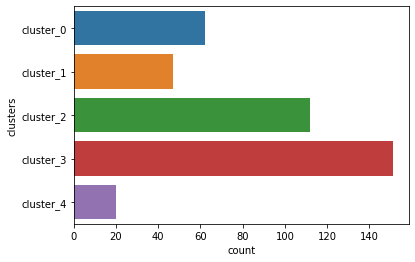

In [76]:
sns.barplot(x=clusters['count'],y=clusters['clusters'])
plt.savefig('cluster_count')

In [57]:
nearby_venues[nearby_venues['Category']=='Café'].iloc[:,1:4]

,Pincode,Neighborhood Latitude,Neighborhood Longitude
8,400001,18.935293,72.835751
28,400001,18.935293,72.835751
37,400001,18.935293,72.835751
38,400001,18.935293,72.835751
53,400001,18.935337,72.839770
...,...,...,...
2960,400099,19.095696,72.855633
2961,400099,19.095696,72.855633
2971,400099,19.095696,72.855633
3030,400104,19.156206,72.840314


In [58]:
Neighborhoods = cafe_data_merged.merge(how='inner',right=nearby_venues[nearby_venues['Category']=='Café'].iloc[:,1:4])
Neighborhoods.drop_duplicates(inplace=True)
Neighborhoods=Neighborhoods.sort_values(by='Café',ascending=False)
Neighborhoods

,Cluster Labels,Neighborhood,Pincode,Café,Venue,Venue Latitude,Venue Longitude,Neighborhood Latitude,Neighborhood Longitude
0,4,Aareymilk Colony,400065,0.166667,Cafe Mosaque,19.162695,72.887740,19.162898,72.883670
1,4,Nagari Niwara,400065,0.166667,Cafe Mosaque,19.162695,72.887740,19.162898,72.883670
2,4,Juhu,400049,0.136364,The hub,19.096669,72.853362,19.099128,72.851993
5,4,Juhu,400049,0.136364,Café Coffee Day - The Lounge,19.095412,72.852895,19.099128,72.851993
8,4,Juhu,400049,0.136364,Café Coffee Day,19.097799,72.848983,19.099128,72.851993
...,...,...,...,...,...,...,...,...,...
3552,2,B P t colony,400003,0.033333,Noorani Milk Centre,18.954749,72.833382,18.957914,72.832230
3566,2,Asvini,400005,0.021277,Grub Shup,19.040679,72.846168,19.039374,72.844252
3567,2,Holiday Camp,400005,0.021277,Grub Shup,19.040679,72.846168,19.039374,72.844252
3568,2,Colaba,400005,0.021277,Grub Shup,19.040679,72.846168,19.039374,72.844252


## Plotting clusters acconding to venue location

In [93]:
# create map
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium
map_clusters = folium.Map(location=[19.0760, 72.8777], zoom_start=11)

# set color scheme for the clusters


rainbow = [colors.rgb2hex(i) for i in ['Red','Blue','Green','Yellow','Orange']]


# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(cafe_data_merged['Venue Latitude'], cafe_data_merged['Venue Longitude'], cafe_data_merged['Venue'], cafe_data_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

     
map_clusters

## Plotting clusters acconding to Neighborhood location

In [94]:
# create map
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium
map_clusters = folium.Map(location=[19.0760, 72.8777], zoom_start=11)

# set color scheme for the clusters
rainbow = [colors.rgb2hex(i) for i in ['Red','Blue','Green','Yellow','Orange']]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Neighborhoods['Neighborhood Latitude'], Neighborhoods['Neighborhood Longitude'], Neighborhoods['Neighborhood'], Neighborhoods['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Conclusion

cluster 1 has 0.1 we means that in cluster 1 no of Neighborhood are less but in that small area there are more cafes its concentrated in small area on the other hand Neighborhoods in cluster 3 are widely spread over the region or mumbai so we can conclude that if you want to explore more cafes in less time you should choose neighborhoods belonging to cluster 2 and 3 also if you want to open a new cafe consider cluster 4 and cluster 0 neighborhoods where compitation seems less